In [1]:
library(tidyverse)
library(repr)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## 1. Data Description

In [2]:
players_data <- read_csv("players.csv")
head(players_data)

nrow(players_data)
ncol(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [3]:
glimpse(players_data)
summary(players_data)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [4]:
players_data %>% summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    total_players = n(),
    subscribe_count = sum(subscribe == "TRUE", na.rm = TRUE),
    percentage_subscribe = subscribe_count / total_players * 100) %>%
    round(2)

mean_played_hours,mean_age,median_played_hours,total_players,subscribe_count,percentage_subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


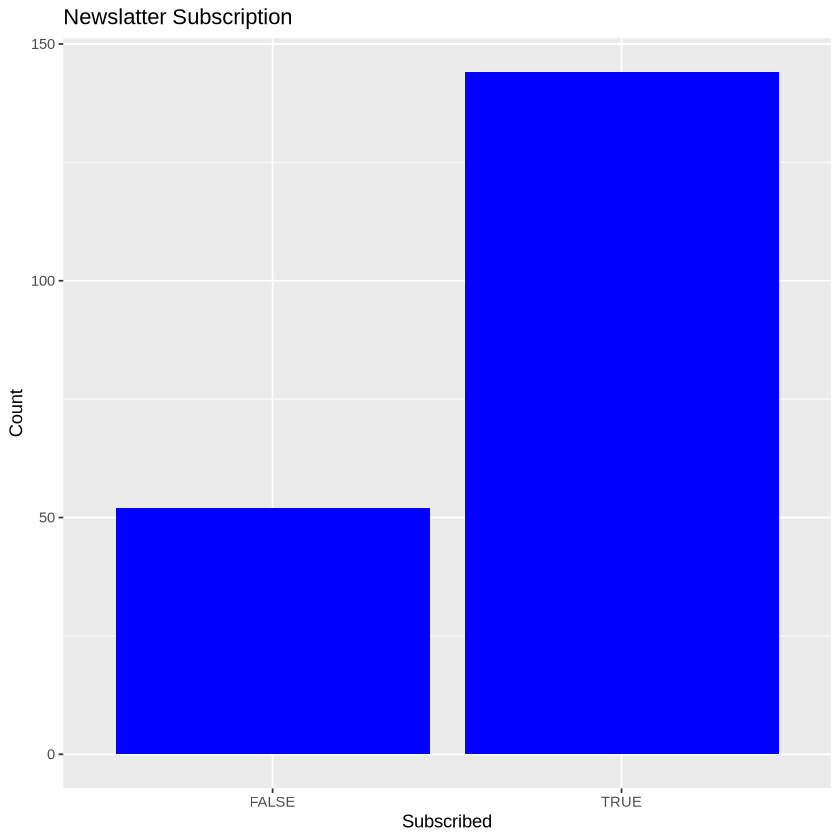

In [6]:
ggplot(players_data, aes(x = subscribe)) +
  geom_bar(fill = "blue") +
  labs(title = "Newslatter Subscription", x = "Subscribed", y = "Count")

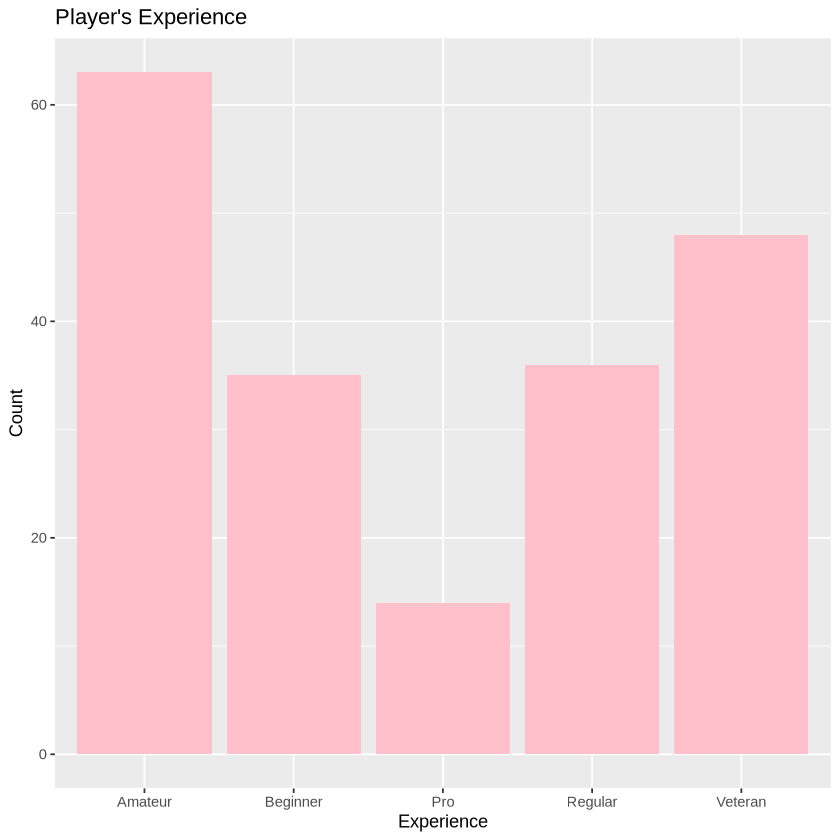

In [7]:
ggplot(players_data, aes(x = experience)) +
  geom_bar(fill = "pink") +
  labs(title = "Player's Experience", x = "Experience", y = "Count")

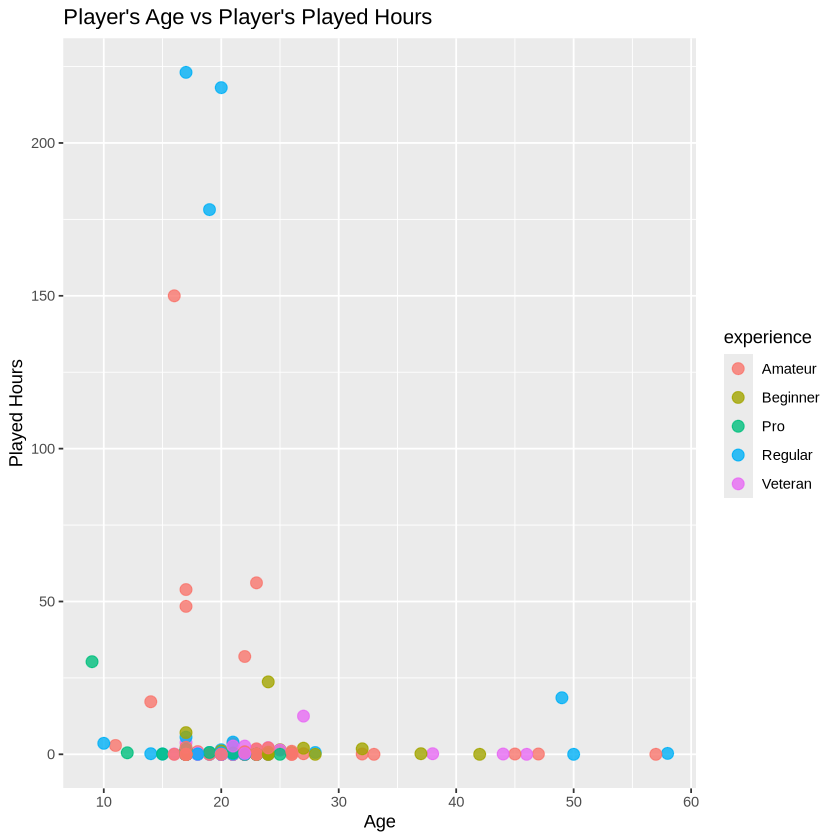

In [8]:
ggplot(players_data, aes(x = Age, y = played_hours, color = experience)) +
  geom_point(size = 3, na.rm = TRUE, alpha = 0.8) +
  labs(title = "Player's Age vs Player's Played Hours", x = "Age", y = "Played Hours")

### players.csv

This data shows all unique players including data about each player like their experiences, behaviours, names, genders, and ages. The data has a total of 196 observations and 7 variables. The variables are as listed below:

| **Variable**   | **Type** | **Description**            | 
|----------------|----------|----------------------------|
| `experience`   | chr      | Level of players in game, for example: Amateur, Beginner, Regular, Pro, Veteran. |           
| `subscribe`    | lgl      | Indicates whether if the player has an active subscription.|           
| `hashedEmail`  | chr      | Player identifier in game.|           
| `played_hours` | dbl      | Indicates how long the player has played the game.|          
| `name`         | chr      | Player's name.|           
| `gender`       | chr      | Player's gender.|           
| `age`          | dbl      | Player's age.|           

### Potential Data Issues

- There are two missing columns in `age` that does not indicate the age or N/A.
- There is an inconsistency in the way to write the `gender` such as F, M, Male, MALE, male.
- There are two ways to identify the players (unique ID) such as `hashedEmail` and `name`.

### Unseen Potential Data Issues

- Measurement bias in `played_hours` because it may vary by recording method.
- Sampling bias in `gender` and `age` because it consists of less female players.

### How the data is collected

- The `experince` data is collected automatically by the game system.
- The `subscribe` data is automatically collected by the system.
- The `hashedEmail` data is automatically collected and given to the players by the system.
- The `player_hours` data is collected based on how long the players played the game (automatically).
- Players fill out the `name`, `gender`, `age`, and saved into the system.